# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

In [3]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        api_response = requests.get(city_url)
        city_weather = api_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | utrik
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | kolasin
Processing Record 7 of Set 1 | robertsport
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | trudobelikovskiy
Processing Record 10 of Set 1 | kumta
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | flying fish cove
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | tofol
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | petropavlovsk-kamchatsky
Processing Record 19 of Set 1 | labytnangi
Processing Record 20 of Set 1 | weno
Processing Record 21 of Set 1 | chonchi
Processing Record 22 of Se

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utrik,11.2278,169.8474,299.23,86,100,9.95,MH,1706755342
1,saipan,15.1355,145.7010,302.54,54,20,9.26,MP,1706754858
2,port-aux-francais,-49.3500,70.2167,278.23,84,97,5.37,TF,1706755342
3,albany,42.6001,-73.9662,274.63,85,100,0.84,US,1706755166
4,bethel,41.3712,-73.4140,275.20,80,100,0.45,US,1706755096


In [37]:
city_data_df['Max Temp'] = (city_data_df['Max Temp'] - 273.15) 
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utrik,11.2278,169.8474,26.08,86,100,9.95,MH,1706755342
1,saipan,15.1355,145.7010,29.39,54,20,9.26,MP,1706754858
2,port-aux-francais,-49.3500,70.2167,5.08,84,97,5.37,TF,1706755342
3,albany,42.6001,-73.9662,1.48,85,100,0.84,US,1706755166
4,bethel,41.3712,-73.4140,2.05,80,100,0.45,US,1706755096


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,26.08,86,100,9.95,MH,1706755342
1,saipan,15.1355,145.7010,29.39,54,20,9.26,MP,1706754858
2,port-aux-francais,-49.3500,70.2167,5.08,84,97,5.37,TF,1706755342
3,albany,42.6001,-73.9662,1.48,85,100,0.84,US,1706755166
4,bethel,41.3712,-73.4140,2.05,80,100,0.45,US,1706755096


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

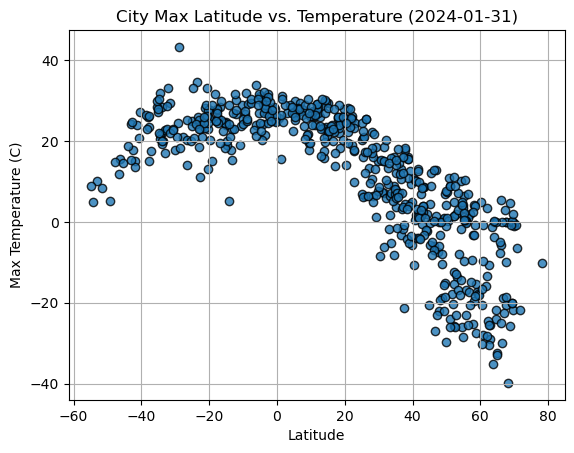

In [40]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-01-31)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

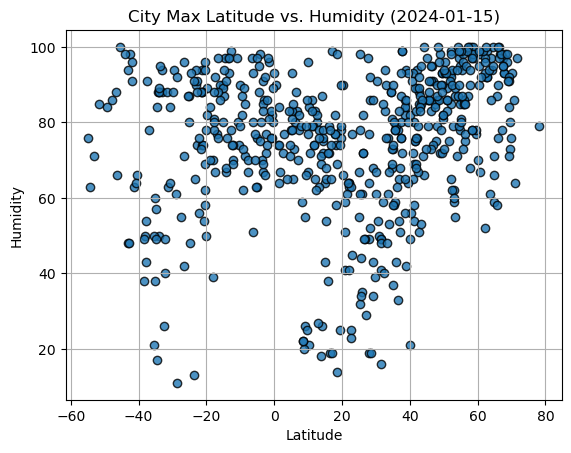

In [41]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2024-01-15)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

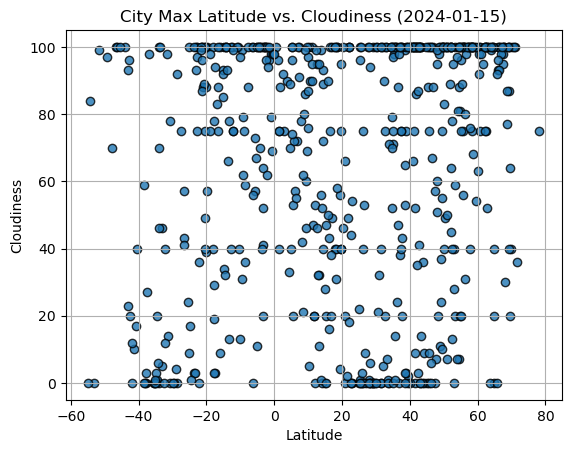

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-01-15)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

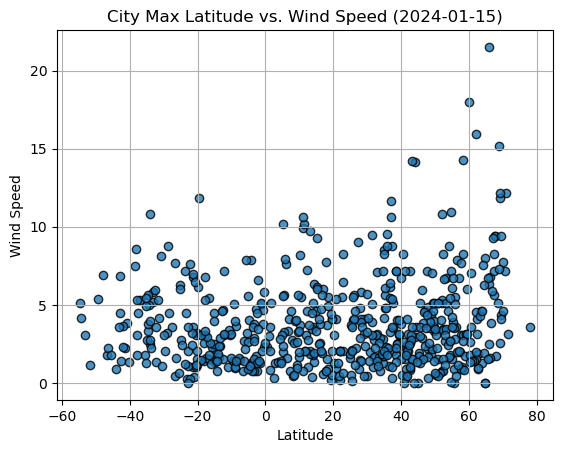

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2024-01-15)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_plot(x,y,x_c,y_c):
    plt.scatter(x, y, marker="o")
    slope, intercept, r, p, se = linregress(x, y)
    y_ = slope * x + intercept
    plt.plot(x,y_, color='r')
    equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    plt.annotate(equation, xy =(x_c,y_c), color='r', fontsize=12) 
    # Incorporate the other graph properties
    
    plt.ylabel(y.name)
    plt.xlabel("Latitude")
    
    
    # Show plot
    print(f'The r-value is: {r**2}')
    plt.show()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,26.08,86,100,9.95,MH,1706755342
1,saipan,15.1355,145.7010,29.39,54,20,9.26,MP,1706754858
3,albany,42.6001,-73.9662,1.48,85,100,0.84,US,1706755166
4,bethel,41.3712,-73.4140,2.05,80,100,0.45,US,1706755096
5,kolasin,42.8223,19.5165,-0.46,51,41,0.98,ME,1706755343


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,5.08,84,97,5.37,TF,1706755342
10,puerto natales,-51.7236,-72.4875,8.24,85,99,1.14,CL,1706755344
11,punta arenas,-53.1500,-70.9167,10.06,71,0,3.09,CL,1706755135
12,flying fish cove,-10.4217,105.6791,28.82,74,40,3.09,CX,1706755345
16,edinburgh of the seven seas,-37.0676,-12.3116,17.62,78,98,5.30,SH,1706755297


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6833380862475151


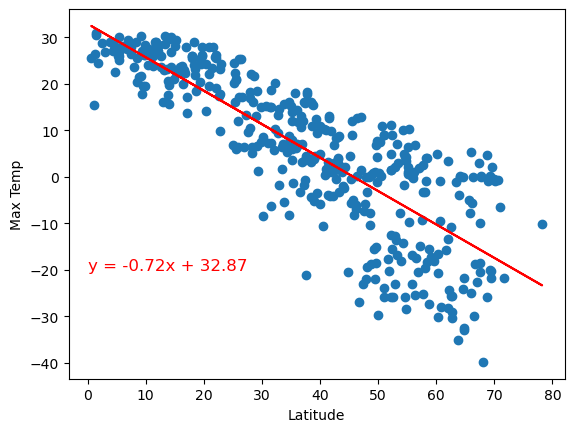

In [56]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
linear_plot(x,y,0, -20)


The r-value is: 0.2305951910658399


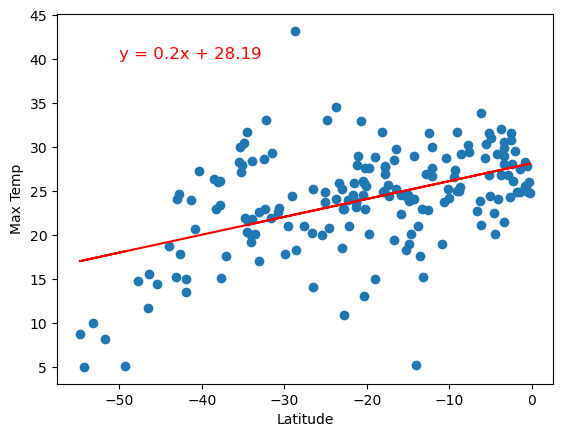

In [58]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
linear_plot(x,y,-50, 40)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northen hemisphere has a strong r value correlation, however the southern hemisphere has a weak correlation. This suggests that there is not enough evedience to support that temperature is effected by latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19195687860950553


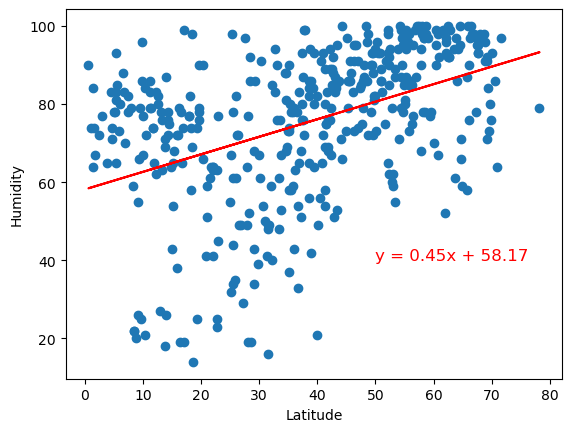

In [60]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
linear_plot(x,y,50, 40)

The r-value is: 0.05598519616236225


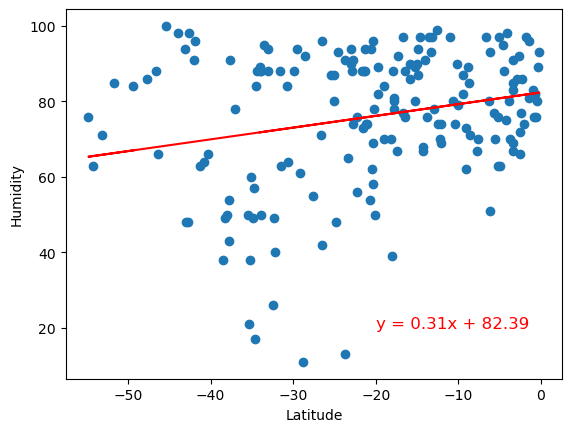

In [62]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
linear_plot(x,y,-20, 20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Both r values for the hemisppheres are very weak. There is no corraltion between Humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03868106363134437


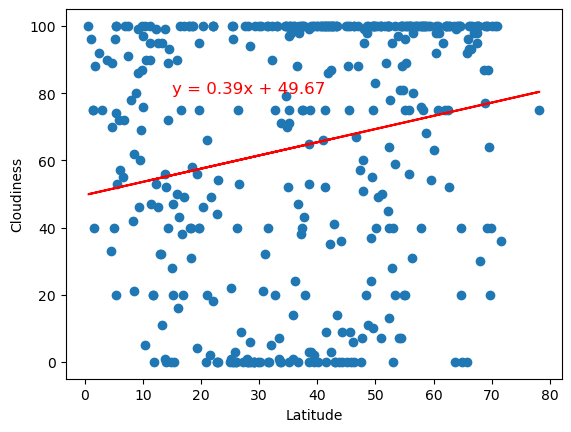

In [64]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
linear_plot(x,y,15, 80)

The r-value is: 0.14412700544411633


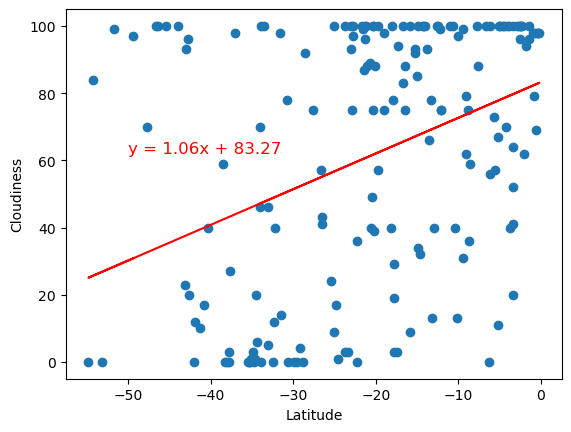

In [66]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
linear_plot(x,y,-50, 62)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Both r values for the hemisppheres are very weak. There is no corraltion between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.028997464629783636


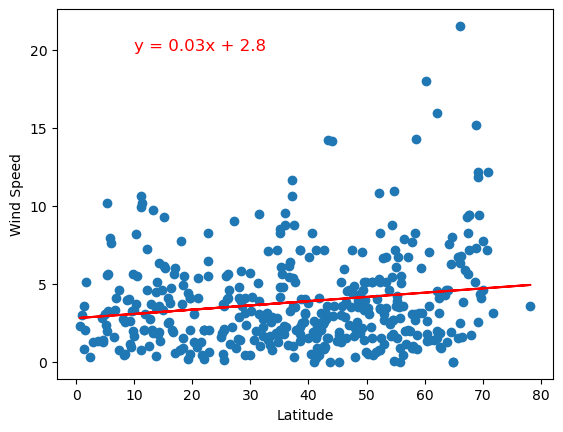

In [68]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
linear_plot(x,y,10, 20)

The r-value is: 0.02998792066664918


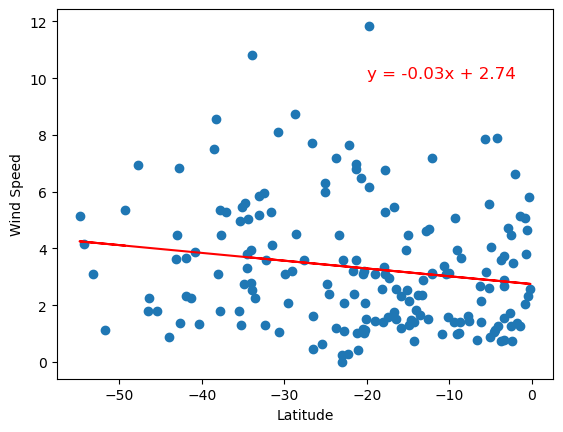

In [70]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
linear_plot(x,y,-20, 10)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Both r values for the hemisppheres are very weak. There is no corraltion between wind speed and latitude.